In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D


# Load the dataset
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

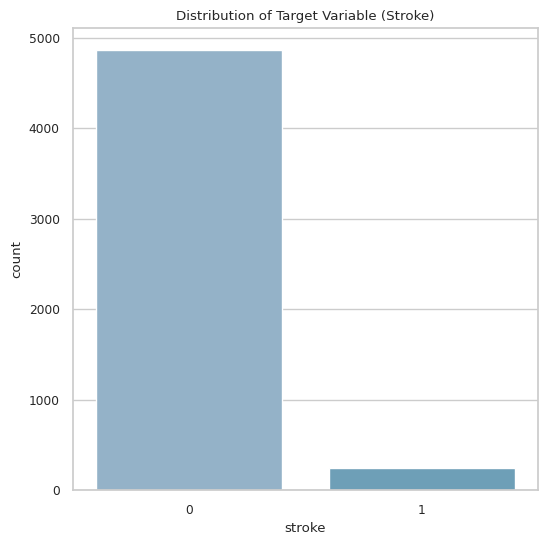

In [41]:
# Set the style of all graphs to seaborn
sns.set_style("whitegrid")

# Plot the target variable 'stroke'
plt.figure(figsize=(6, 6))
sns.countplot(x=data['stroke'])
plt.title('Distribution of Target Variable (Stroke)')
plt.show()

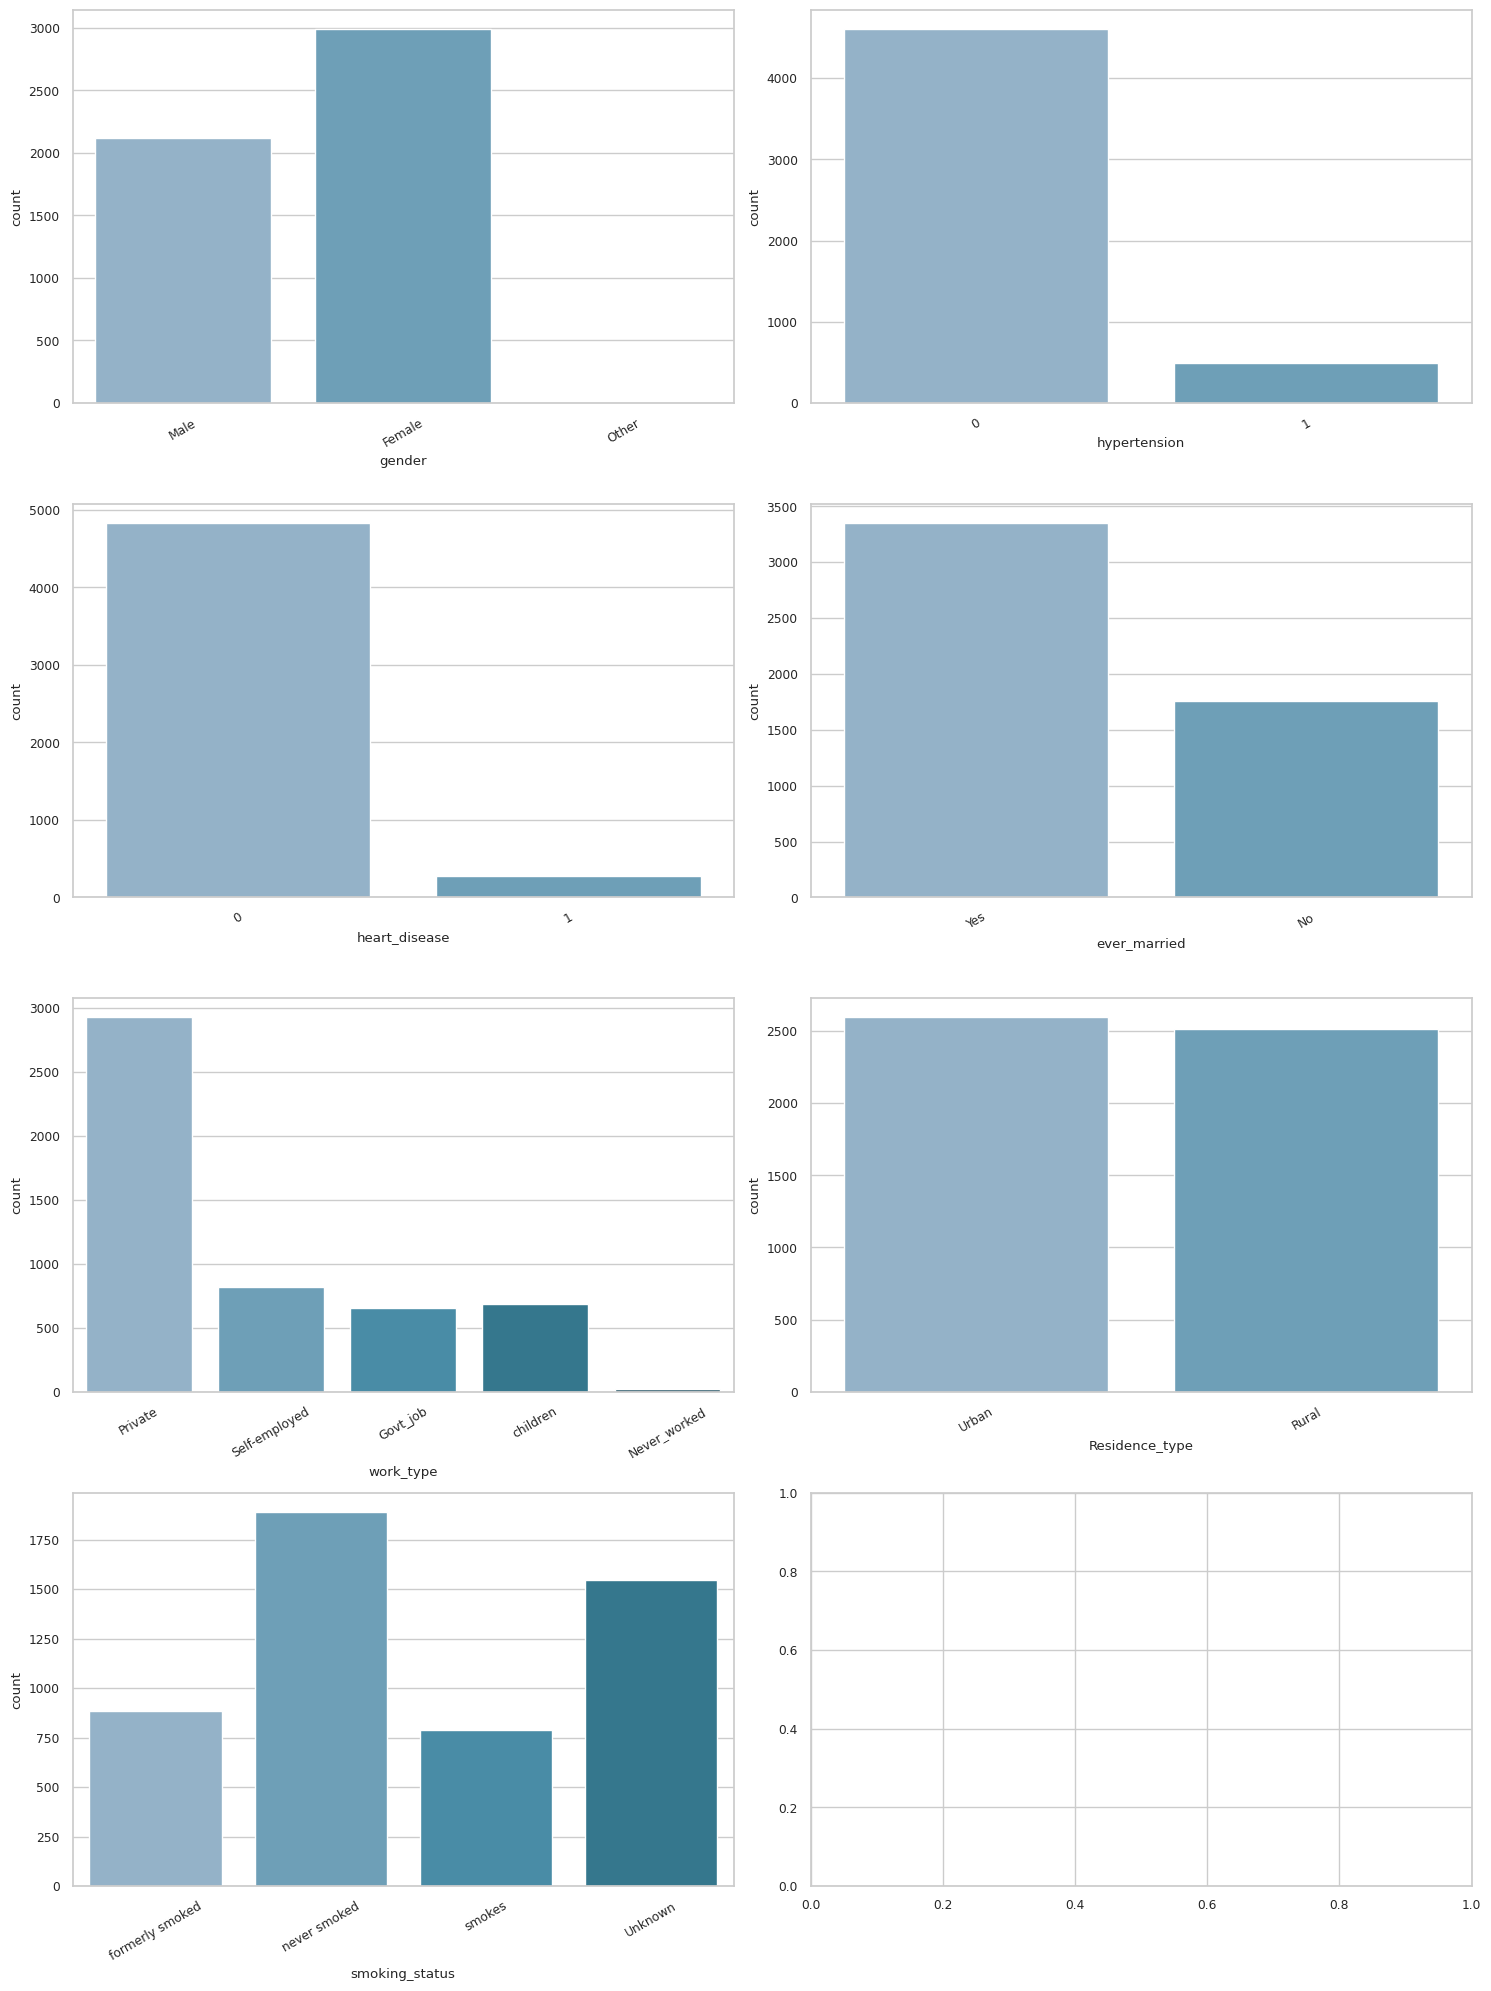

In [42]:
# List of categorical variables
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plotting the bar plots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for var, subplot in zip(categorical_variables, axs.flatten()):
    sns.countplot(x=var, data=data, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

plt.tight_layout()
plt.show()

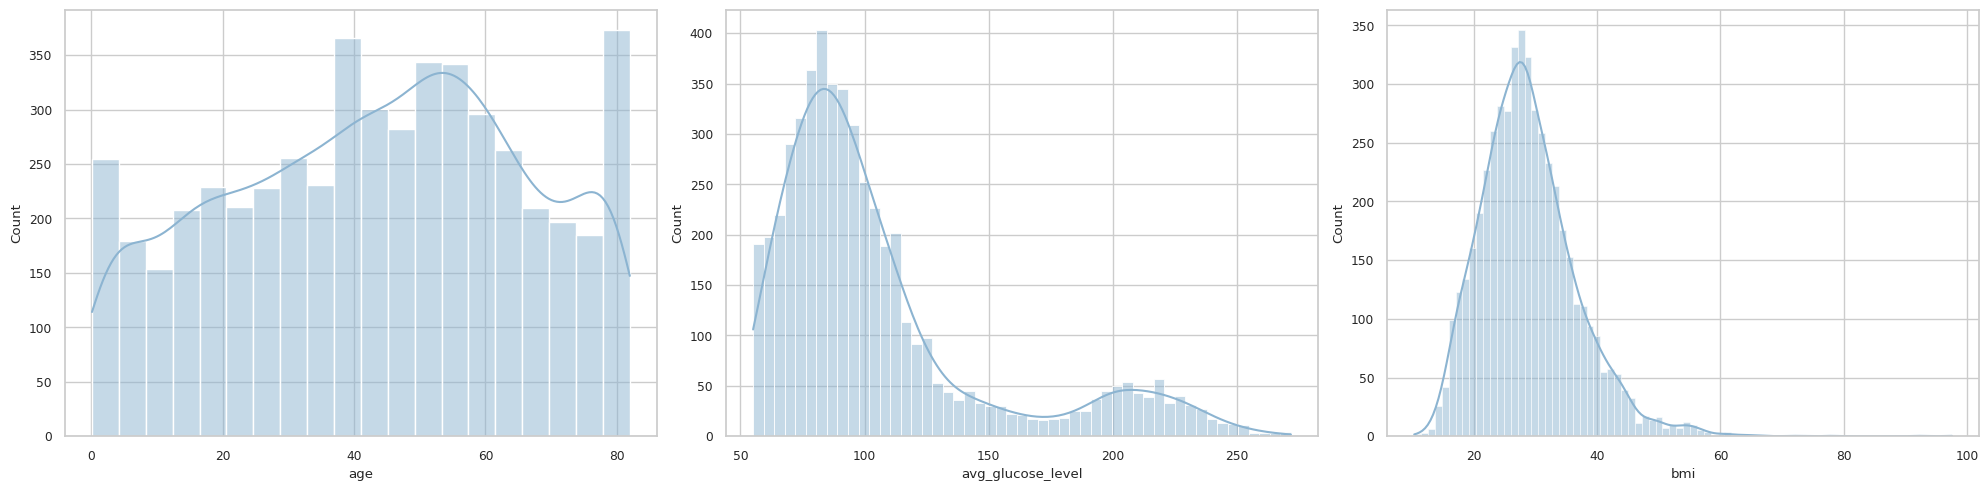

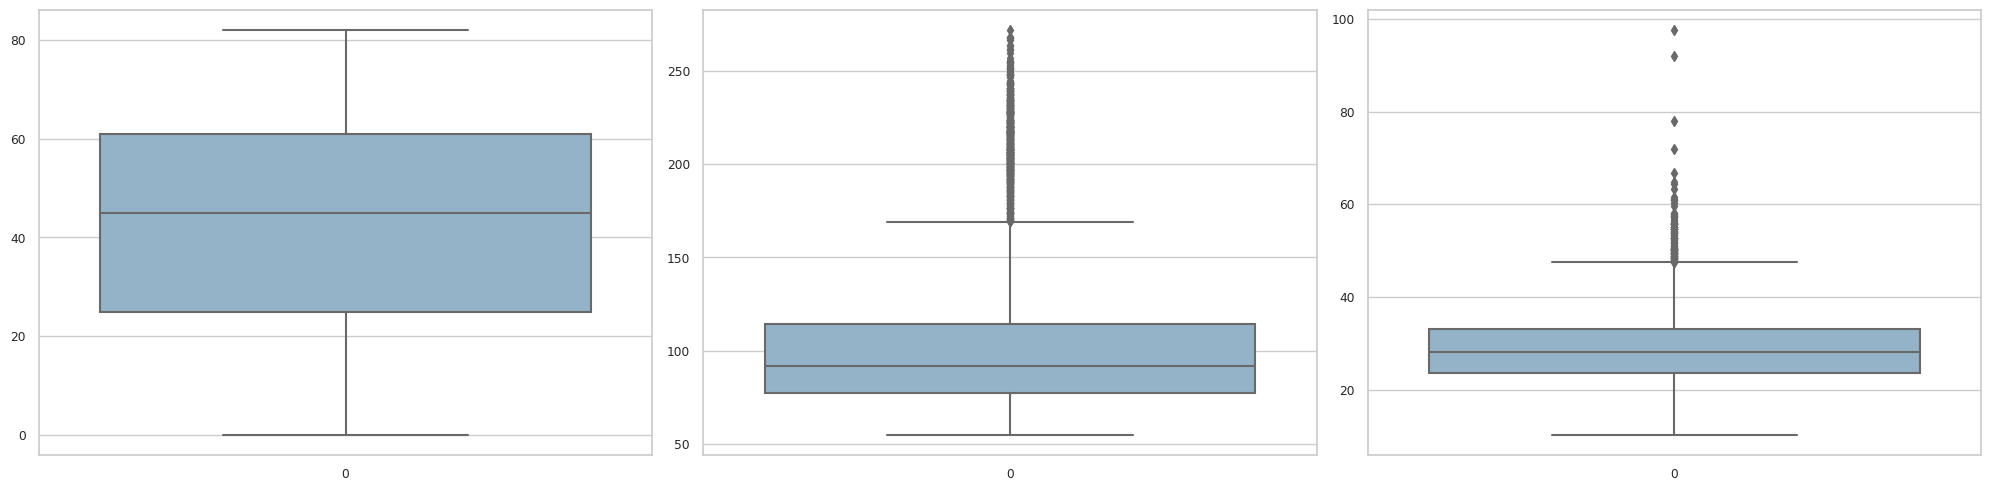

In [43]:
# List of continuous variables
continuous_variables = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(data[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(data[var], ax=subplot)

plt.tight_layout()
plt.show()

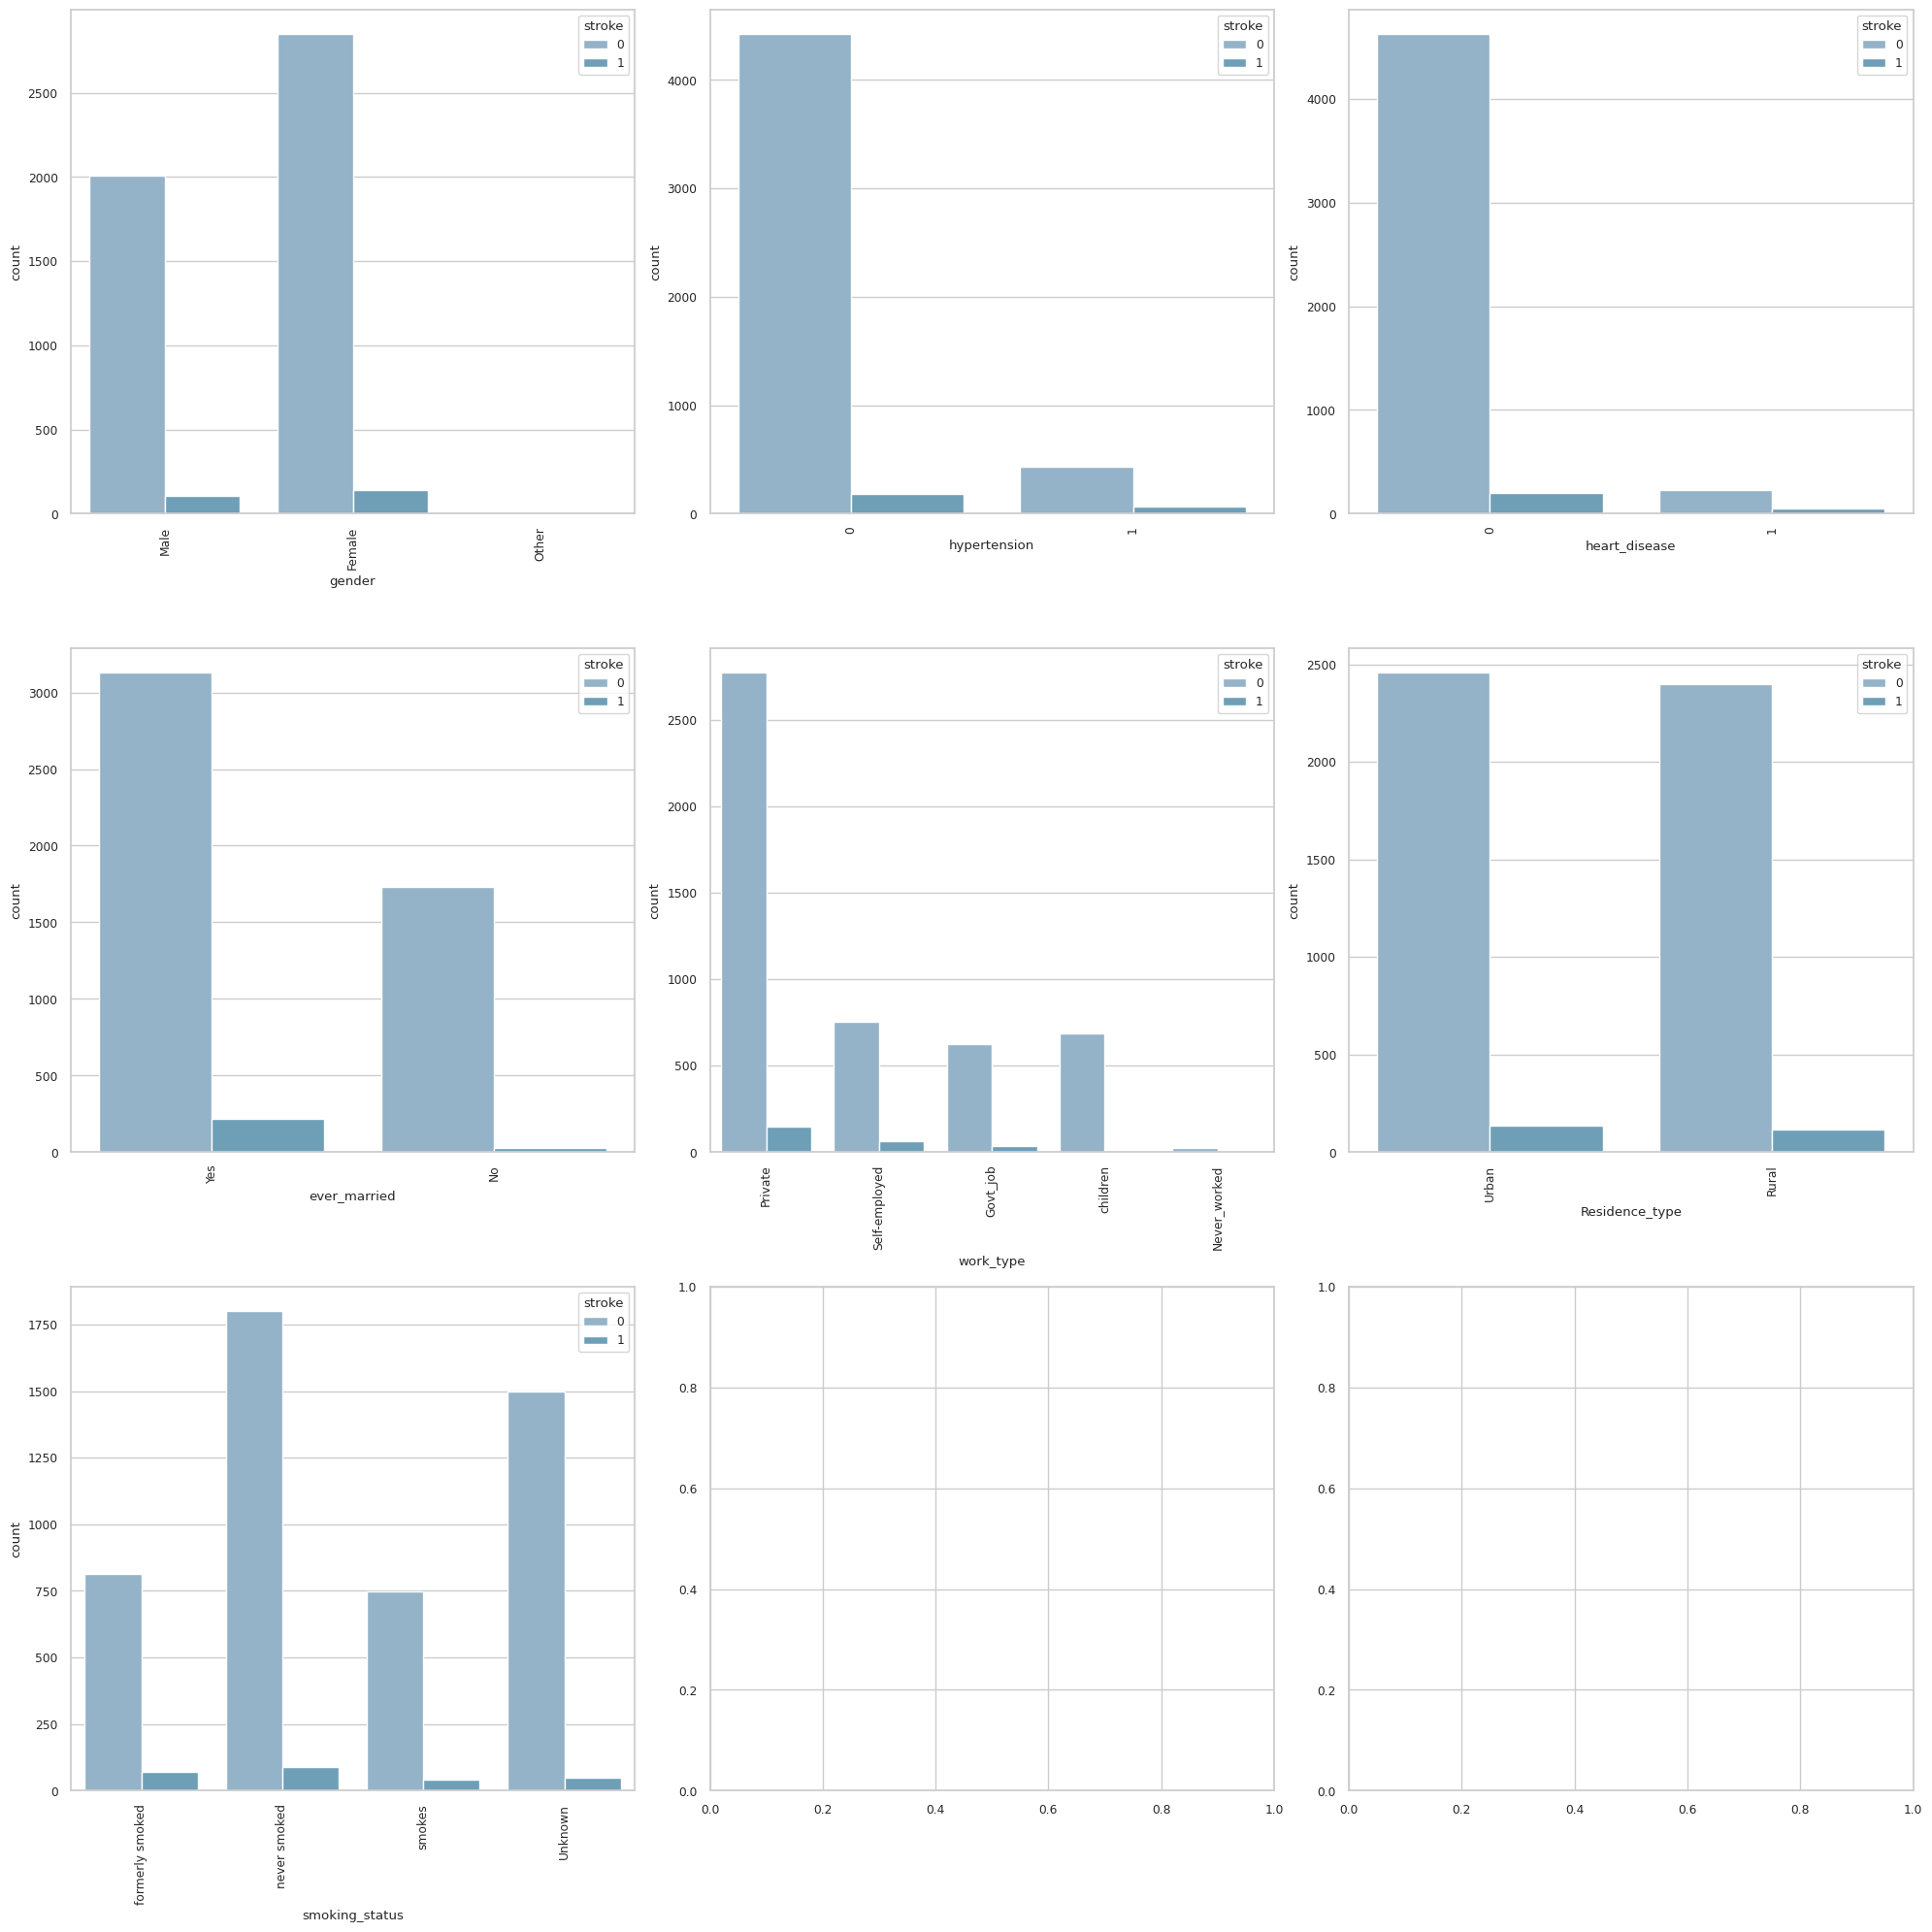

In [44]:
# Plot the categorical variables against the target variable 'stroke'
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for var, subplot in zip(categorical_variables, axs.flatten()):
    sns.countplot(x=data[var], hue=data['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

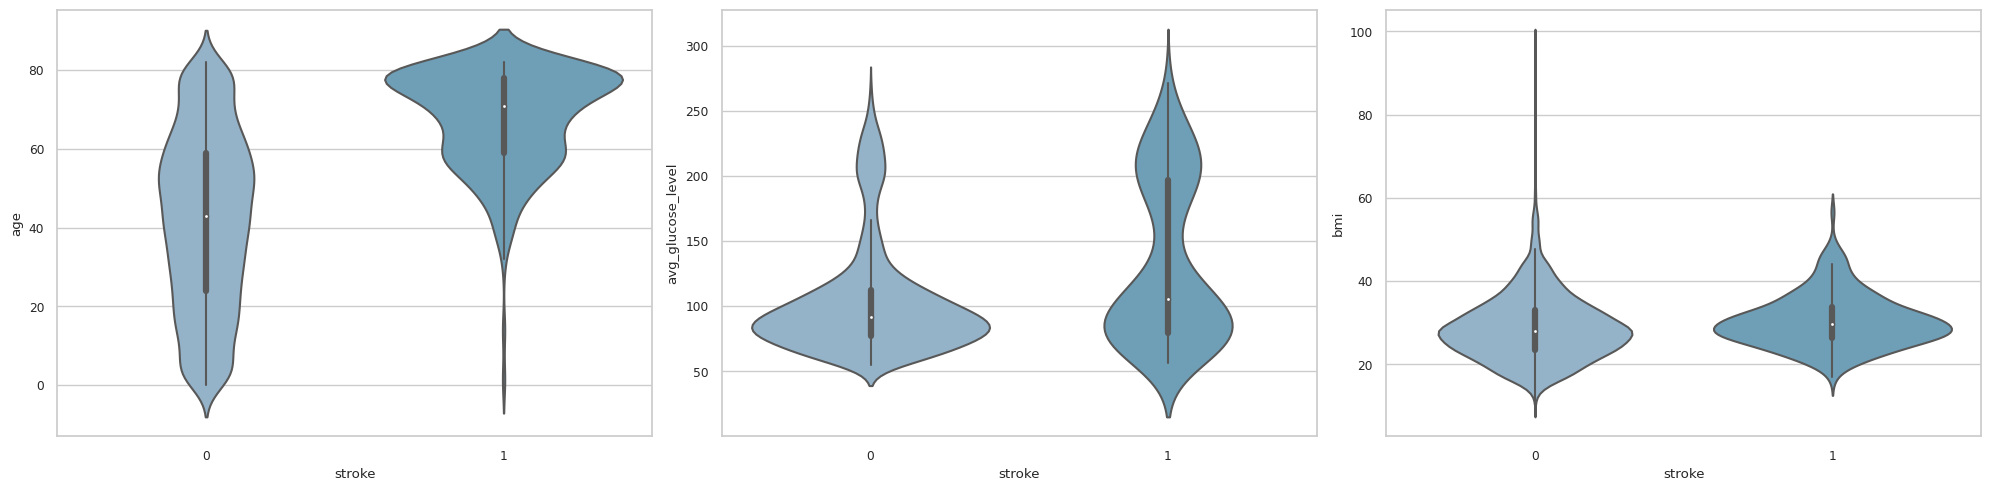

In [45]:
# Plot the continuous variables against the target variable 'stroke'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.violinplot(x=data['stroke'], y=data[var], ax=subplot)

plt.tight_layout()
plt.show()

In [46]:
# Re-load the original dataset
data_original = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data_original = data_original.drop("id",axis=1)

# Select categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply one-hot encoding to the categorical columns
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(data_original[categorical_cols])

# Convert the one-hot encoded array into a dataframe
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the dataset
data_original.drop(categorical_cols, axis=1, inplace=True)

# Concatenate the original dataframe with the one-hot encoded dataframe
data_one_hot_encoded = pd.concat([data_original, one_hot_encoded_df], axis=1)

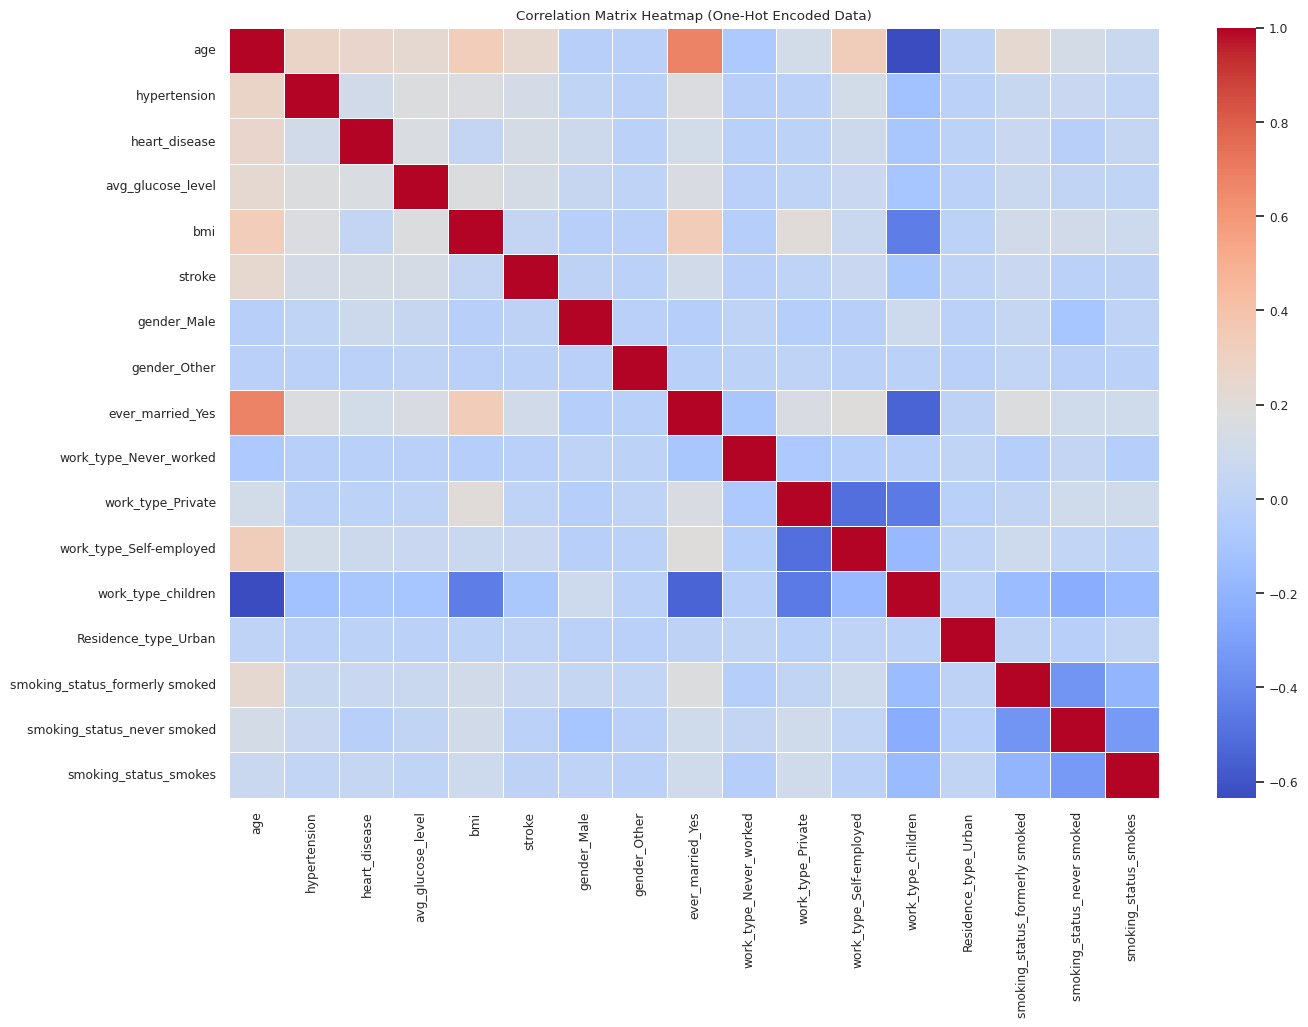

In [47]:
# Compute the correlation matrix for the one-hot encoded data
correlation_matrix_one_hot = data_one_hot_encoded.corr()

# Plot the heatmap for the entire correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_one_hot, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (One-Hot Encoded Data)")
plt.show()

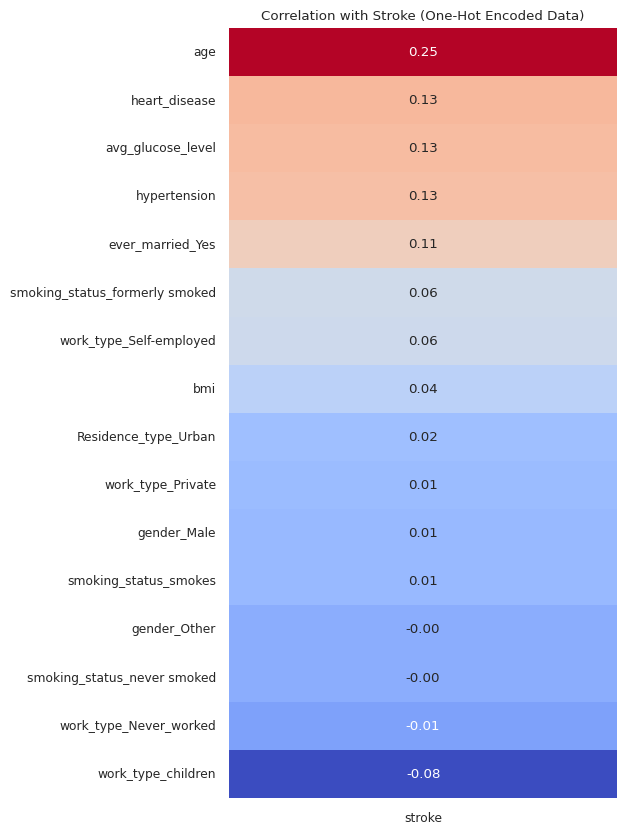

In [48]:
# Compute the correlation of each feature with the target variable 'stroke'
target_corr_one_hot = correlation_matrix_one_hot['stroke'].drop('stroke')

# Sort correlation values in descending order
target_corr_sorted_one_hot = target_corr_one_hot.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target column
plt.figure(figsize=(5, 10))
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted_one_hot.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Stroke (One-Hot Encoded Data)')
plt.show()

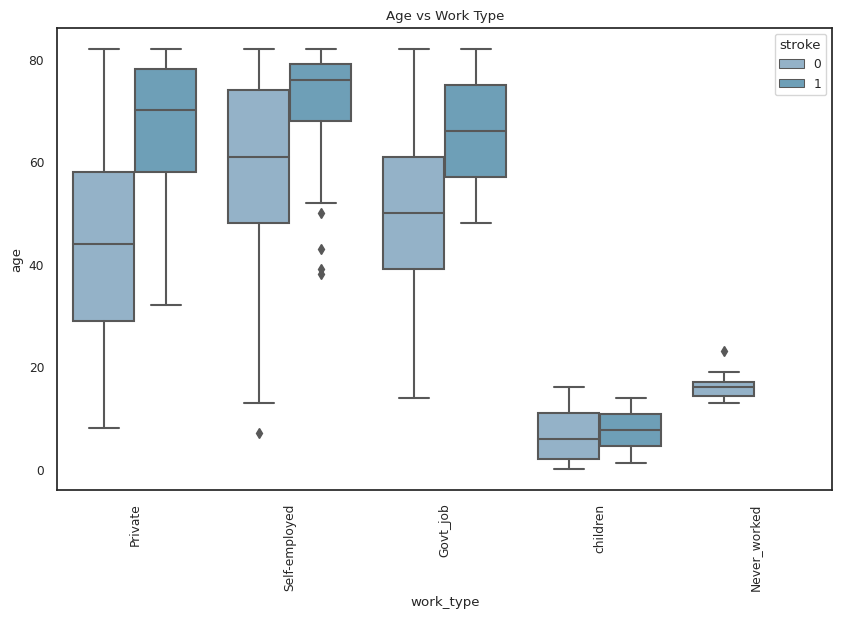

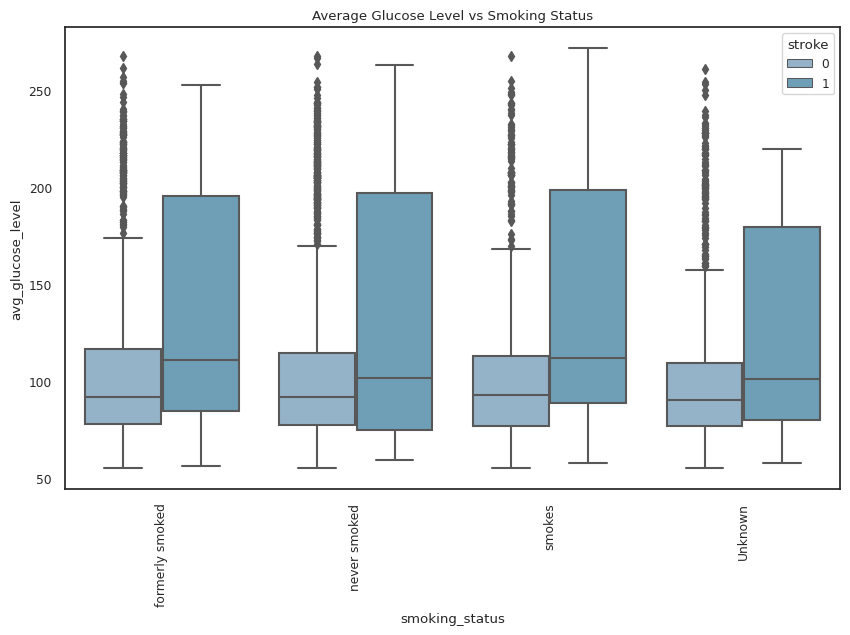

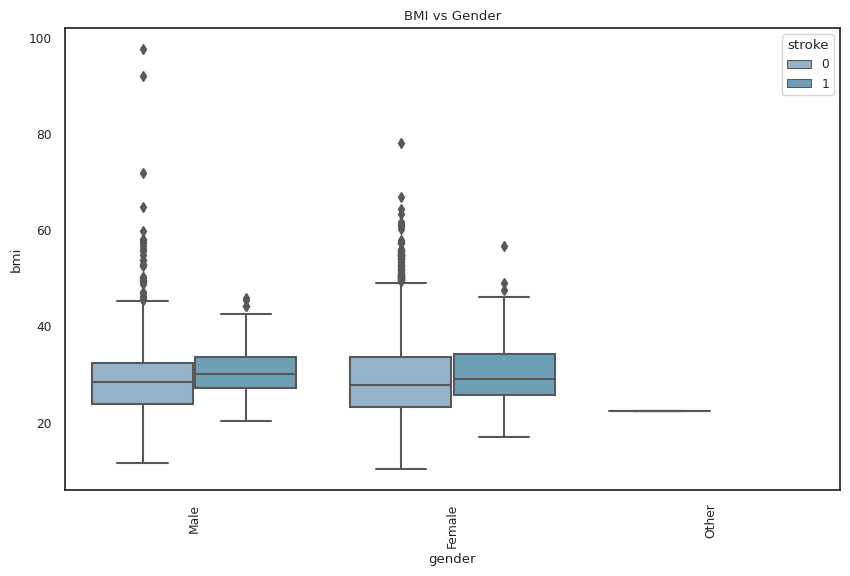

In [49]:
# Boxplot of 'age' vs 'work_type'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['work_type'], y=data['age'], hue=data['stroke'])
plt.title('Age vs Work Type')
plt.xticks(rotation=90)
plt.show()

# Boxplot of 'avg_glucose_level' vs 'smoking_status'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['smoking_status'], y=data['avg_glucose_level'], hue=data['stroke'])
plt.title('Average Glucose Level vs Smoking Status')
plt.xticks(rotation=90)
plt.show()

# Boxplot of 'bmi' vs 'gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['gender'], y=data['bmi'], hue=data['stroke'])
plt.title('BMI vs Gender')
plt.xticks(rotation=90)
plt.show()

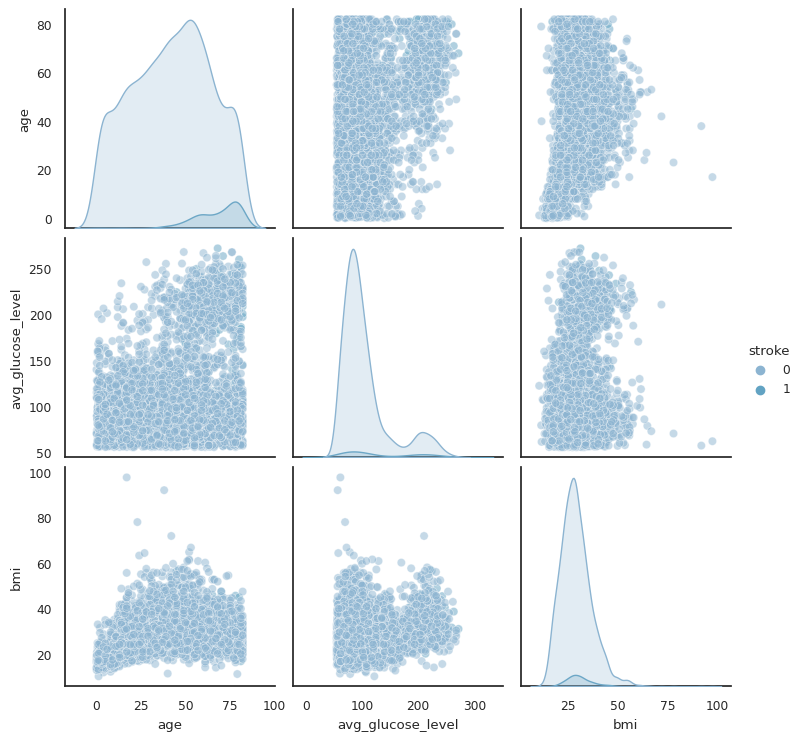

In [50]:
# Subset the data for the pairplot
subset = data[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Convert 'stroke' to a categorical variable for the pairplot
subset['stroke'] = subset['stroke'].astype('category')

# Generate the pairplot
sns.pairplot(subset, hue='stroke', plot_kws={'alpha': 0.5})
plt.show()


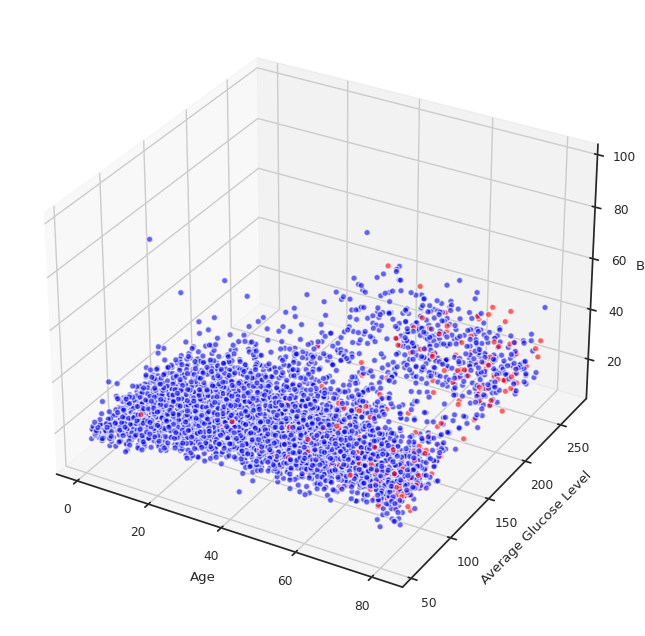

In [51]:
# Create a color map for the 'stroke' variable
colors = data['stroke'].map({0:'blue', 1:'red'})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(data['age'], data['avg_glucose_level'], data['bmi'], c=colors, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
plt.show()


In [52]:
# Load the data
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

# Check for missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [53]:
from sklearn.neighbors import KNeighborsRegressor

def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(include=[np.number])
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

na_cols = [col for col in data.columns if data[col].isnull().sum()!=0]

for col in na_cols:  
    data = knn_impute(data, col)

In [54]:
# Check for missing values again to verify
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [55]:
# Remove ID Rows
data = data.drop('id',axis=1)

# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

num_duplicate_rows

0

In [56]:
# Define a function to calculate the number of outliers using the IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ((column < lower_bound) | (column > upper_bound)).sum()

# Check for outliers in 'age', 'avg_glucose_level', and 'bmi'
outliers = {column: count_outliers(data[column]) for column in ['age', 'avg_glucose_level', 'bmi']}

outliers

{'age': 0, 'avg_glucose_level': 627, 'bmi': 117}

In [57]:
# Check for zero or negative values in 'avg_glucose_level' and 'bmi'
zero_or_negative_values = {column: (data[column] <= 0).sum() for column in ['avg_glucose_level', 'bmi']}

zero_or_negative_values

{'avg_glucose_level': 0, 'bmi': 0}

{'avg_glucose_level': 380, 'bmi': 73}


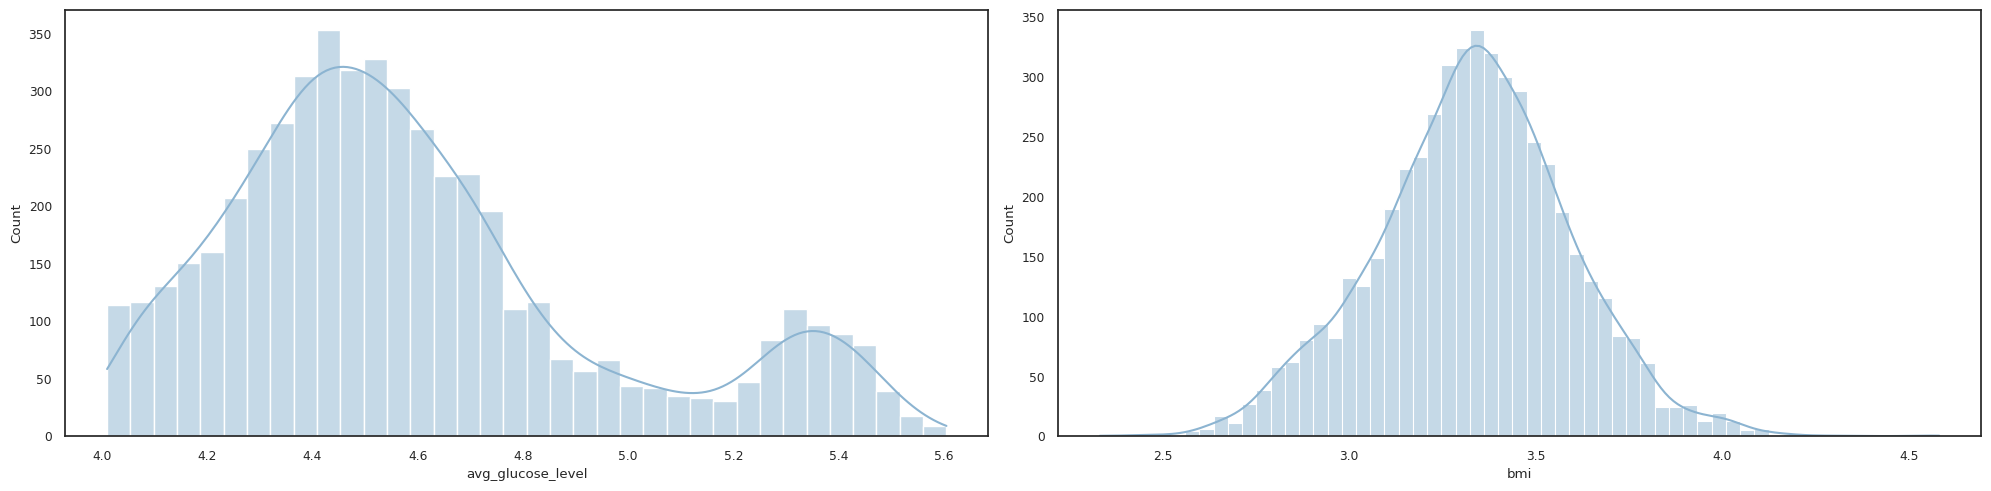

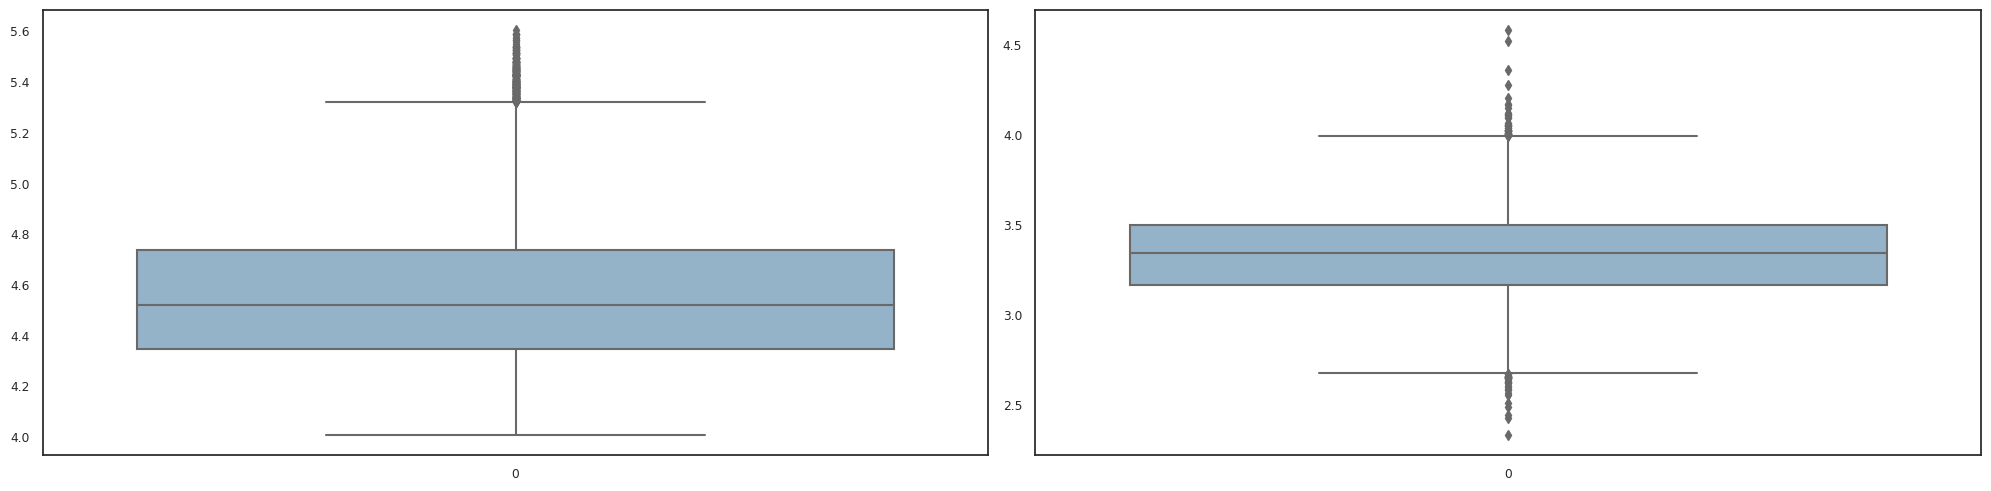

In [58]:
# Apply log transformation
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
data['bmi'] = np.log(data['bmi'])

# Check for outliers in 'avg_glucose_level' and 'bmi' after transformation
outliers_transformed = {column: count_outliers(data[column]) for column in ['avg_glucose_level', 'bmi']}

print(outliers_transformed)

# List of continuous variables
continuous_variables = ['avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(data[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(data[var], ax=subplot)

plt.tight_layout()
plt.show()

In [59]:
# Check unique values in categorical columns
unique_values_categorical = {column: data[column].unique() for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']}

In [60]:
# Count the number of 'Other' instances in 'gender' and 'Unknown' instances in 'smoking_status'
other_gender_count = (data['gender'] == 'Other').sum()
unknown_smoking_status_count = (data['smoking_status'] == 'Unknown').sum()

other_gender_count, unknown_smoking_status_count

(1, 1544)

In [61]:
# Drop the row with 'Other' for 'gender'
data = data[data['gender'] != 'Other']

# Convert categorical variables to numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [62]:
# Check unique values in 'hypertension', 'heart_disease', and 'stroke'
unique_values_binary = {column: data[column].unique() for column in ['hypertension', 'heart_disease', 'stroke']}

unique_values_binary

{'hypertension': array([0, 1]),
 'heart_disease': array([1, 0]),
 'stroke': array([1, 0])}

In [63]:
# Load the dataset
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [64]:
# Apply the data cleansing process prior
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Categorical columns
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']

# Find the most frequent category in the 'gender' column
most_frequent_gender = df['gender'].value_counts().idxmax()
# Merge 'Other' with the most frequent category
df['gender'] = df['gender'].replace('Other', most_frequent_gender)

# Apply log transformation
df['avg_glucose_level'] = np.log(df['avg_glucose_level'])
df['bmi'] = np.log(df['bmi'])

# Mapping values and replacing them in the 'ever_married' column
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

# Perform one-hot encoding on the categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)
# Drop the 'id' column
df_encoded = df_encoded.drop(columns='id')

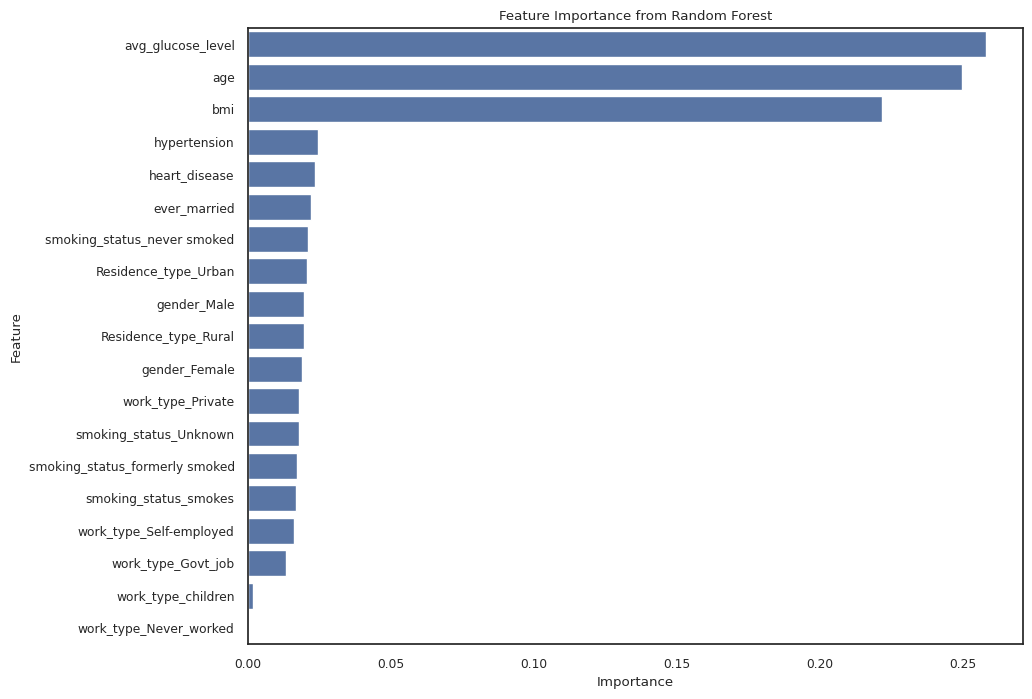

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define the feature matrix X and the target y
X = df_encoded.drop(columns='stroke')
y = df_encoded['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df, x='Importance', y='Feature', color='b')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [66]:
# Define function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply function to the 'bmi' column to create the new 'bmi_category' column
df_encoded['bmi_category'] = df_encoded['bmi'].apply(categorize_bmi)

# Define function to categorize age
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 65:
        return 'Adult'
    else:
        return 'Senior'

# Apply function to the 'age' column to create the new 'age_category' column
df_encoded['age_category'] = df_encoded['age'].apply(categorize_age)

# Define function to compute health risk score
def compute_health_risk_score(row):
    score = 0
    # Add 1 to the score for every risk factor the individual has
    if row['age_category'] == 'Senior':
        score += 1
    if row['hypertension'] == 1:
        score += 1
    if row['heart_disease'] == 1:
        score += 1
    if row['bmi_category'] in ['Overweight', 'Obese']:
        score += 1
    if row['smoking_status_smokes'] == 1:
        score += 1
    return score

# Apply function to the entire DataFrame to create the new 'health_risk_score' column
df_encoded['health_risk_score'] = df_encoded.apply(compute_health_risk_score, axis=1)

# Display the first few rows of the updated DataFrame
df_encoded.head()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category,age_category,health_risk_score
0,67.0,0,1,1,5.432367,3.600048,1,False,True,False,...,False,False,True,False,True,False,False,Underweight,Senior,2
1,61.0,0,0,1,5.309307,3.335770,1,True,False,False,...,False,True,False,False,False,True,False,Underweight,Adult,0
2,80.0,0,1,1,4.662684,3.481240,1,False,True,False,...,False,True,False,False,False,True,False,Underweight,Senior,2
3,49.0,0,0,1,5.143008,3.538057,1,True,False,False,...,False,False,True,False,False,False,True,Underweight,Adult,1
4,79.0,1,0,1,5.159745,3.178054,1,True,False,False,...,False,True,False,False,False,True,False,Underweight,Senior,2


In [67]:
# Perform one-hot encoding on the new categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['bmi_category', 'age_category'])

# Display the first few rows of the updated DataFrame
df_encoded.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,...,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,health_risk_score,bmi_category_Underweight,age_category_Adult,age_category_Child,age_category_Senior
0,67.0,0,1,1,5.432367,3.600048,1,False,True,False,...,True,False,True,False,False,2,True,False,False,True
1,61.0,0,0,1,5.309307,3.335770,1,True,False,False,...,False,False,False,True,False,0,True,True,False,False
2,80.0,0,1,1,4.662684,3.481240,1,False,True,False,...,False,False,False,True,False,2,True,False,False,True
3,49.0,0,0,1,5.143008,3.538057,1,True,False,False,...,True,False,False,False,True,1,True,True,False,False
4,79.0,1,0,1,5.159745,3.178054,1,True,False,False,...,False,False,False,True,False,2,True,False,False,True


In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

##-------DATA CLEANSING-------##

na_cols = [col for col in df.columns if df[col].isnull().sum()!=0]

for col in na_cols:  
    df = knn_impute(df, col)

# Fill missing values in the 'bmi' column with its median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Merge 'Other' with the most frequent category in the 'gender' column
most_frequent_gender = df['gender'].value_counts().idxmax()
df['gender'] = df['gender'].replace('Other', most_frequent_gender)


##-------DATA PREPARATION-------##

# Mapping values and replacing them in the 'ever_married' column
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

# Perform one-hot encoding on the categorical variables
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
# Drop the 'id' column
df_encoded = df_encoded.drop(columns='id')

#-------feature engineering------#

# Define functions for feature engineering
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 65:
        return 'Adult'
    else:
        return 'Senior'

def compute_health_risk_score(row):
    score = 0
    if row['age_category'] == 'Senior':
        score += 1
    if row['hypertension'] == 1:
        score += 1
    if row['heart_disease'] == 1:
        score += 1
    if row['bmi_category'] in ['Overweight', 'Obese']:
        score += 1
    if row['smoking_status_smokes'] == 1:
        score += 1
    return score

# Apply functions to create new features
df_encoded['bmi_category'] = df_encoded['bmi'].apply(categorize_bmi)
df_encoded['age_category'] = df_encoded['age'].apply(categorize_age)
df_encoded['health_risk_score'] = df_encoded.apply(compute_health_risk_score, axis=1)

# Perform one-hot encoding on the new categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['bmi_category', 'age_category'])

# Check class distribution in the target variable
df_encoded['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [70]:
# Define the features and target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority') # sampling strategy is set to 'majority' to undersample the majority class
scaler = StandardScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('StandardScaler', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])

In [72]:
# Define the hyperparameter grid
#param_grid = {
#    'Model__max_depth': [3, 5, 7],
#    'Model__learning_rate': [0.01, 0.1, 0.2],
#    'Model__n_estimators': [100, 200, 500],
#    'Model__gamma': [0, 0.1, 0.2],
#    'Model__min_child_weight': [1, 5, 10],
#    'Model__subsample': [0.5, 0.7, 1.0],
#    'Model__colsample_bytree': [0.5, 0.7, 1.0]
#}

# Define the scoring function
#scoring = make_scorer(roc_auc_score)

# Perform hyperparameter grid search
#grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=3, verbose=2)
#grid_search.fit(X_train, y_train)

# Print the best parameters
#best_params = grid_search.best_params_
#best_params

In [73]:
# Define the model with the optimal hyperparameters
model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.01,
    max_depth=7,
    min_child_weight=5,
    n_estimators=100,
    subsample=0.5,
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [74]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       960
           1       0.21      0.55      0.30        62

    accuracy                           0.84      1022
   macro avg       0.59      0.71      0.61      1022
weighted avg       0.92      0.84      0.88      1022



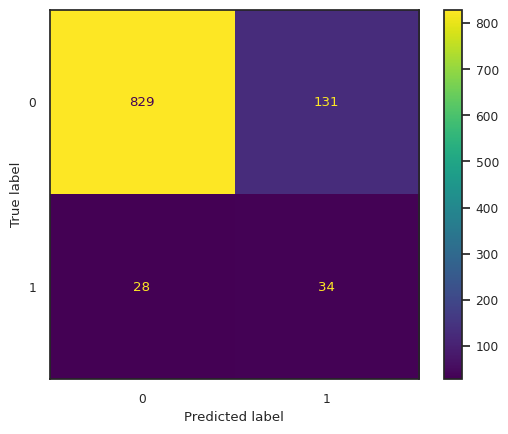

In [75]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()


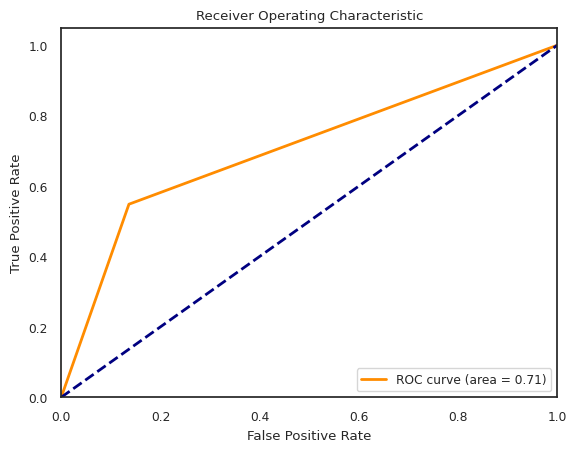

In [76]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

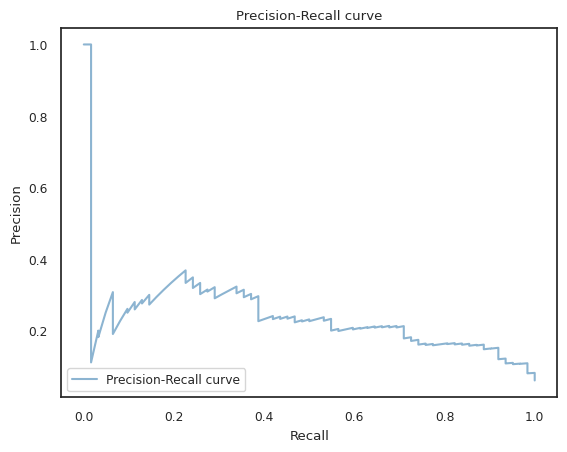

In [77]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

plt.show()

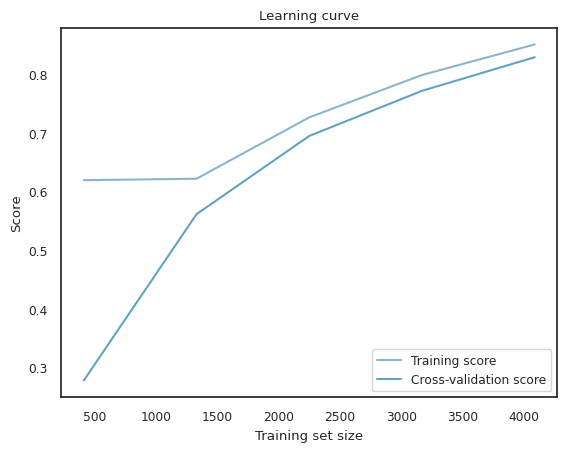

In [78]:
# Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc="lower right")
plt.show()